# Sparklines

Adding visualizations to data tables

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

**Data source**:  Average Price Data ( https://www.bls.gov/cpi/data.htm )
* Visualize price changes of various products from March 2024 to February 2025

<Axes: >

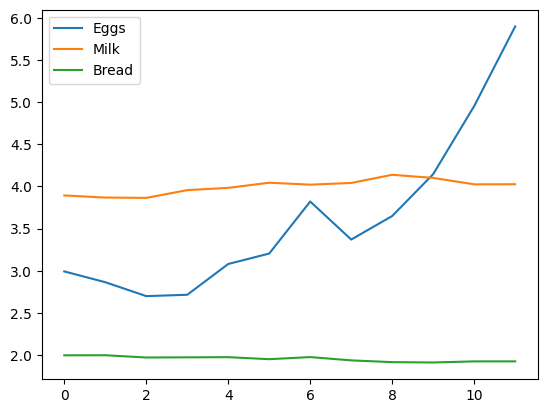

In [2]:
data_dict = {
    "Eggs": [2.992, 2.864, 2.699, 2.715, 3.080, 3.204, 3.821, 3.370, 3.649, 4.146, 4.953, 5.897],
    "Milk": [3.893, 3.868, 3.864, 3.956, 3.983, 4.044, 4.021, 4.041, 4.138, 4.101, 4.025, 4.026],
    "Bread": [1.997, 1.998, 1.971, 1.973, 1.975, 1.951, 1.976, 1.937, 1.916, 1.912, 1.925, 1.925]    
}

# generate line plots
df = pd.DataFrame(data_dict)
df.plot()
    



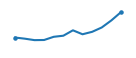

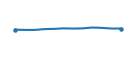

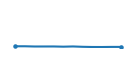

In [5]:
# generate sparklines 

x_vals = list(range(12))
    
i = 0
for product in data_dict:
    fig, ax = plt.subplots(figsize=(1.5, 0.5))
    ax.plot(x_vals, data_dict[product])
    ax.scatter([x_vals[0], x_vals[-1]], [data_dict[product][0], data_dict[product][-1]], s=5 )
    ax.set_ylim(1.8, 6.2)
    ax.axis("off")
    
    plt.show()
    i += 1
    

Now let's format the data table. Here is our current view:

In [6]:
df

,Eggs,Milk,Bread
0,2.992,3.893,1.997
1,2.864,3.868,1.998
2,2.699,3.864,1.971
3,2.715,3.956,1.973
4,3.080,3.983,1.975
5,3.204,4.044,1.951
6,3.821,4.021,1.976
7,3.370,4.041,1.937
8,3.649,4.138,1.916
9,4.146,4.101,1.912


Suppose we want one product per row, with columns showing starting price, ending price, and percent increase. Let's reformat:

In [7]:
formatted_data = {
    "Product": [w for w in data_dict],
    "Start Price": [data_dict[w][0] for w in data_dict],
    "End Price": [data_dict[w][-1] for w in data_dict],
    "Percent Increase": [round(100 * (data_dict[w][-1] - data_dict[w][0]) / data_dict[w][0], 2) for w in data_dict]
}

formatted_df = pd.DataFrame(formatted_data)
formatted_df

,Product,Start Price,End Price,Percent Increase
0,Eggs,2.992,5.897,97.09
1,Milk,3.893,4.026,3.42
2,Bread,1.997,1.925,-3.61


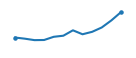

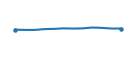

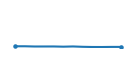

In [8]:
# add column for images 

x_vals = list(range(12))
    
i = 0
for product in data_dict:
    fig, ax = plt.subplots(figsize=(1.5, 0.5))
    ax.plot(x_vals, data_dict[product])
    ax.scatter([x_vals[0], x_vals[-1]], [data_dict[product][0], data_dict[product][-1]], s=5 )
    ax.set_ylim(1.8, 6.2)
    ax.axis("off")
    
    plt.savefig(f"product_{i}.png", transparent=True)
    i += 1

In [12]:
image_links = [f'<img src="product_{i}.png">' for i in range(3)]
formatted_df["Trend"] = image_links

formatted_df


,Product,Start Price,End Price,Percent Increase,Trend
0,Eggs,2.992,5.897,97.09,"<img src=""product_0.png"">"
1,Milk,3.893,4.026,3.42,"<img src=""product_1.png"">"
2,Bread,1.997,1.925,-3.61,"<img src=""product_2.png"">"


In [11]:
formatted_df.style.hide(axis="index")

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


Product,Start Price,End Price,Percent Increase,Trend
Eggs,2.992000,5.897000,97.090000,
Milk,3.893000,4.026000,3.420000,
Bread,1.997000,1.925000,-3.610000,


In [13]:

df_styled = formatted_df.style.format(
    {
        'Start Price': '{:.2f}'.format,
        'End Price': '{:.2f}'.format,
        'Percent Increase': '{:.2f}'.format
    }
).hide(axis="index").set_properties(subset=['Product'], **{'text-align': 'left'})

df_styled


Product,Start Price,End Price,Percent Increase,Trend
Eggs,2.99,5.90,97.09,
Milk,3.89,4.03,3.42,
Bread,2.00,1.93,-3.61,


In [71]:
# Export to HTML
# removes default styling

df_styled.to_html("table.html", index=False, escape = False)

Additional data table styling can be found here:  https://pandas.pydata.org/docs/reference/api/pandas.io.formats.style.Styler.set_properties.html 